# AMS 595 Project 4: Mandelbrot Set, Markov Chain, Taylor Series Approximation 

## Computing the Mandelbrot Set

In [54]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

In [55]:
# Setting parameters
n_max = 50 # Setting max number of iterations
threshold = 50 # Setting threshold for divergence
n = 1000

In [56]:
# Creating a grid of complex numbers
x, y = np.mgrid[-2:1:n*1j, -1.5:1.5:n*1j] # Generating x-values and y-values
c = x + 1j * y # Creating the grid
z = np.zeros_like(c) 

In [57]:
# Creating boolean mask indicating which points are in the set to keep track of which points are bounded
mask = np.ones(c.shape, dtype=bool) 

In [58]:
# Performing iteration to compute each value of z
for i in range(n_max):
    z[mask] = z[mask]**2 + c[mask]
    mask[np.abs(z) > threshold] = False

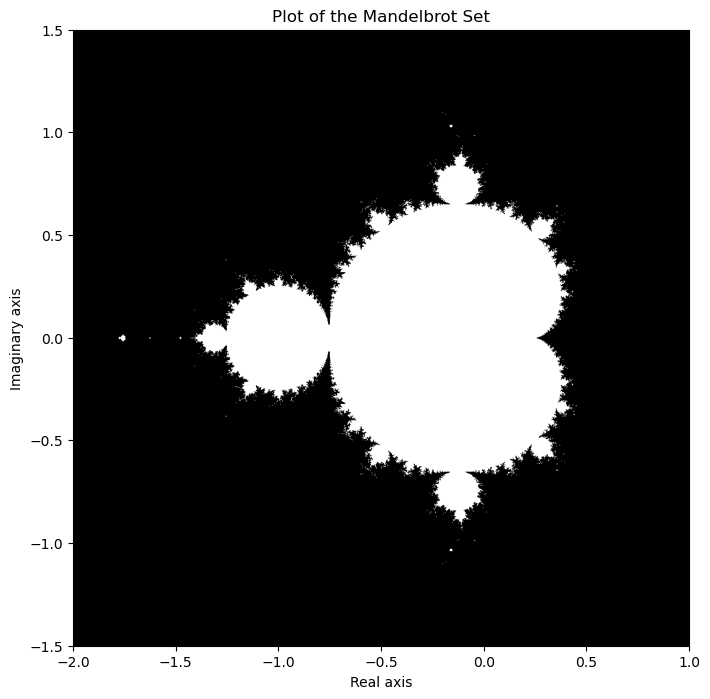

In [59]:
# Plotting the mandelbrot set
plt.figure(figsize=(8, 8))
plt.imshow(mask.T, extent=[-2, 1, -1.5, 1.5], cmap='gray', origin='lower')
plt.title("Plot of the Mandelbrot Set")
plt.xlabel("Real axis")
plt.ylabel("Imaginary axis")
plt.savefig("mandelbrot.png", dpi=300)
plt.show()

## Markov Chain

In [61]:
# Setting parameters
n = 5 # Number of states
N = 50 # Number of transitions

### Task 1: Constructing a random 5 × 5 matrix P and normalize each row so that:

$$
\sum_{j=1}^{5} p_{ij} = 1
$$


In [63]:
P = np.random.rand(n, n) # Creating random 5x5 matrix
P = P / P.sum(axis=1)[:, None]  # Normalizing each row
print("Transition matrix P:\n", P)
print("Row sums:", P.sum(axis=1))

Transition matrix P:
 [[0.24558095 0.10381768 0.15363327 0.13713498 0.35983312]
 [0.47592674 0.0707172  0.08493364 0.27996449 0.08845792]
 [0.10766041 0.2546471  0.2672123  0.15747782 0.21300237]
 [0.32074515 0.13106996 0.26130239 0.07017966 0.21670284]
 [0.19690972 0.1258655  0.39930877 0.1321068  0.1458092 ]]
Row sums: [1. 1. 1. 1. 1.]


### Task 2: Constructing a random size-5 vector p, normalizing it, and applying the transition rule 50 times

In [65]:
p = np.random.rand(n) # Constructing random size-5 vector p
p = p / p.sum() # Normalizing vector
print("Initial probability vector p:\n", p)
print("Sum of p:", p.sum())

Initial probability vector p:
 [0.15572144 0.3336166  0.30868912 0.12050827 0.08146458]
Sum of p: 1.0


In [66]:
# Applying the transition rule 50 times to get p50
p_copy = p.copy() # Making a copy of original p vector
for _ in range(N):
    p_copy = np.dot(p_copy, P)  # Computing p(k+1) = p(k) * P 

p50 = p_copy
print("p50 after 50 transitions:\n", p50)
print("Sum of p50:", p50.sum())

p50 after 50 transitions:
 [0.2464211  0.14426504 0.24072205 0.15140767 0.21718414]
Sum of p50: 0.9999999999999988


### Task 3: Computing the stationary distribution

In [68]:
eigenvalues, eigenvectors = np.linalg.eig(P.T) # Computing eigenvalues and eigenvectors
index = np.argmin(np.abs(eigenvalues - 1))  # Picking the eigenvalue closest to 1
v = eigenvectors[:, index].real  # Only taking real part to avoid errors
p_stationary = v / v.sum()  # Normalizing eigenvector
print("Stationary distribution p_stationary:\n", p_stationary)
print("Sum of p_stationary:", p_stationary.sum())

Stationary distribution p_stationary:
 [0.2464211  0.14426504 0.24072205 0.15140767 0.21718414]
Sum of p_stationary: 1.0000000000000002


### Task 4: Computing the component-wise difference between p50 and the stationary distribution

In [70]:
diff = np.abs(p50 - p_stationary)
print("Component-wise difference between p50 and p_stationary:\n", diff)

Component-wise difference between p50 and p_stationary:
 [2.49800181e-16 3.05311332e-16 1.94289029e-16 2.22044605e-16
 4.16333634e-16]


In [71]:
# Checking if they match within 10^-5
match = np.all(diff < 1e-5)
print(match)

True


## Taylor Series Approximation

### Task 1: Writing a function:

Takes in the following inputs: 

- **func** — the function you would like to approximate  
- **start** — the beginning of your interval  
- **end** — the end of your interval  
- **degree** — the last integer where you will be truncating your series
- **fixed c** — the point you will be expanding around

and outputs a NumPy array of points approximating f in the interval (start, end).

In [74]:
# Importing libraries
from math import factorial
import sympy as sp

In [75]:

def taylor(func, start, end, degree, c):
    """
    Approximates a function using its Taylor series expansion around point c.
    
    Parameters:
        func : callable
            The function you want to approximate.
        start : float
            Beginning of your interval.
        end : float
            End of your interval.
        degree : int
             The last integer where you will be truncating your series.
        c : float
            The point that you will be expanding around.
    
    Returns:
        x_values : np.ndarray
            Points in the interval [start, end].
        approx_values : np.ndarray
            Approximated function values using Taylor series.
    """
    # Defining symbolic variable x
    x = sp.symbols('x')
    
    # Constructing Taylor series
    taylor_series = 0 # Initializing the Taylor series as 0
    # Looping from n = 0 to degree: computing each term of the Taylor series
    for n in range(degree + 1):
        derivative = func(x).diff(x, n) # Computing the nth derivative
        taylor_term = derivative.subs(x, c) / sp.factorial(n) * (x - c)**n # Computing Taylor term
        taylor_series += taylor_term # Adding each term to the series
    
    # Converting symbolic series to numeric function so that we can evaluate
    taylor_function = sp.lambdify(x, taylor_series, 'numpy')

    # Creating a numpy array of points in the interval (start,end)
    x_values = np.linspace(start, end, 100)
    # Evaluating the Taylor series at all points in x_values
    approx_values = taylor_function(x_values)
    
    return x_values, approx_values




### Task 2: Running the 'Taylor' function using the following parameters:

The parameters for the Taylor series approximation are:


- **Function:** $$ f(x) = x \sin^2(x) + \cos(x) $$ 
- **Numerical domain:**  $$ [-10, 10] $$ with 100 points  
- **Number of terms:** 100 terms in the series 
- **Expansion point:** Expand around $$  c = 0  $$


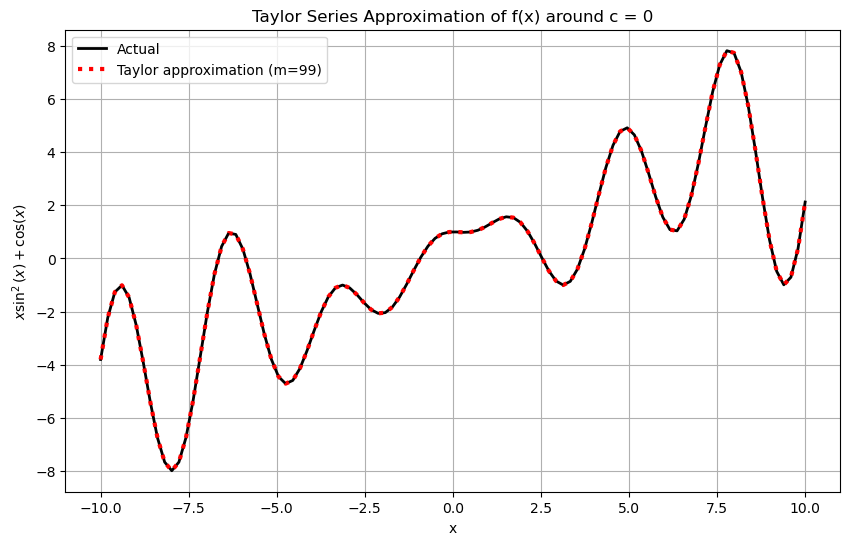

In [77]:
# Testing the function
# Defining a function using sympy
def f_sym(x):
    return x * sp.sin(x)**2 + sp.cos(x)

# Setting parameters
start = -10 # Beginning of the interval
end = 10 # End of the interval
degree = 99 # Truncating after 100 terms 
c = 0 # Expand around c = 0

# Computing Taylor series approximation
x_values, approx_values = taylor(f_sym, start, end, degree, c)

# Creating numeric version of original function so that we can plot it
x_numeric = np.linspace(start, end, 100)
original_values = x_numeric * np.sin(x_numeric)**2 + np.cos(x_numeric)

# Plotting the function and the Taylor approximation
plt.figure(figsize=(10,6))
plt.plot(x_numeric, original_values, label='Actual', color='black',linewidth=2)
plt.plot(x_values, approx_values, ':', label=f'Taylor approximation (m={degree})', color='red',linewidth=3)
plt.xlabel('x')
plt.ylabel(r'$x \sin^2(x) + \cos(x)$')
plt.title('Taylor Series Approximation of f(x) around c = 0')
plt.legend()
plt.grid(True)
plt.show()

### Creating a wrapper function that takes in additional inputs:

- Initial degree
- Final degree
- Degree step

and runs the function from task 1 for various cut off values, starting from initial degree until final degree, with step size degree step.

In [79]:
# Importing libraries
import numpy as np
import sympy as sp
import pandas as pd
import time

In [80]:
def factorial(func, start, end, c, initial_degree, final_degree, degree_step, num_points=100):
    """
    This functions runs Taylor series approximations for multiple degrees and records absolute errors and computation times.
    
    Parameters:
        func : callable
            Symbolic function created using sympy.
        start : float
            Beginning of the interval.
        end : float
            End of the interval.
        c : float
            Point with which we expand around.
        initial_degree : int
            First degree to test.
        final_degree : int
            Last degree to test.
        degree_step : int
            Step size between degrees.
        num_points : int
            Number of points in the interval to evaluate.
    
    Returns:
        df : pandas.DataFrame
            DataFrame containing degree, abs_error, time_seconds
    """
    # Creating domain for evaluation
    x_values = np.linspace(start, end, num_points)
    
    # Defining a symbolic variable to differentiate
    x_sym = sp.symbols('x')

    # Computing the true values at all points for comparison
    true_values = sp.lambdify(x_sym, func(x_sym), 'numpy')(x_values)
    
    results = [] # Creating a list to store the results for each degree

    # Looping over all degrees from initial to final with user-defined degree step
    for degree in range(initial_degree, final_degree + 1, degree_step):
        start_time = time.time() # Starting timer

        # Constructing Taylor series for specified degree
        taylor_series = 0 # Initializing taylor series
        for n in range(degree + 1): # Computing each term of taylor series up to the current degree
            derivative = func(x_sym).diff(x_sym, n) # Computing nth derivative
            taylor_term = derivative.subs(x_sym, c) / sp.factorial(n) * (x_values - c)**n # Computing taylor term
            taylor_series += taylor_term # Adding taylor term to the series

        approx_values = np.array(taylor_series).astype(np.float64) # Converting series to numeric so that we can evaluate
        time_elapsed = time.time() - start_time # Measuring how much time has elapsed

        # Computing the sum of the absolute differences between the true function and the approximation
        abs_error = np.sum(np.abs(true_values - approx_values))

        # Storing the results in a dictionary
        results.append({'degree': degree, 'abs_error': abs_error, 'time_seconds': time_elapsed})
    
    # Converting the list of results into a pandas dataframe and saving it to a csv file
    df = pd.DataFrame(results)
    df.to_csv('taylor_values.csv', index=False)

    return df


In [81]:
# Testing function for intial degree = 50, final degree = 100, degree step = 10

# Defining symbolic function
def f_sym(x):
    return x * sp.sin(x)**2 + sp.cos(x)

# Running factorial function with specified inputs
df_results = factorial(
    func=f_sym,
    start=-10,
    end=10,
    c=0,
    initial_degree=50,
    final_degree=100,
    degree_step=10,
    num_points=100
)

print(df_results)


   degree     abs_error  time_seconds
0      50  4.949573e+01      0.110382
1      60  1.754212e-03      0.112951
2      70  1.275624e-07      0.131078
3      80  1.319471e-07      0.168288
4      90  1.319471e-07      0.167311
5     100  1.319471e-07      0.179794
